## Estadistica Aplicada

Sesion 8 - 6 de septiembre

Bárbara Govea Serna 1902869

Grupo 42

In [2]:
# Librerias Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
# Librerias Especializadas
from lifelines import KaplanMeierFitter

In [4]:
relación = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

### Esta base de datos muestra el tiempo de supervivencia de una relación en semanas (t), el evento es que la relación se termina, la columna estado es la columna de evento/censura
La muestra es de 42 personas que estan en una relación

In [5]:
relación.count()

tratamiento    42
t              42
estado         42
dtype: int64

In [6]:
relación.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


In [7]:
# Estimador Kaplan Meier de la función de supervivencia, primero el tiempo después la censura
km1 = KaplanMeierFitter().fit(relación['t'],relación['estado'])

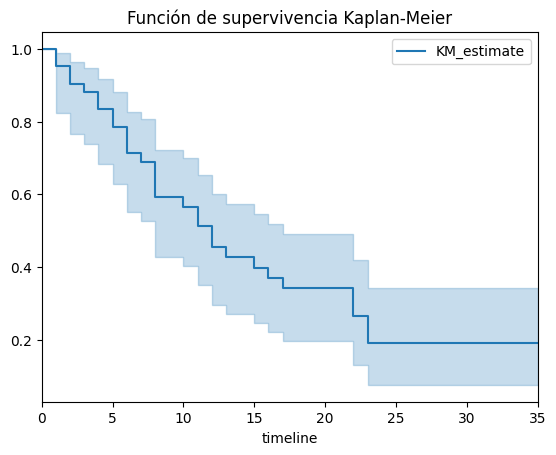

In [8]:
# Grafica de función de supervivencia
km1.plot_survival_function()
plt.title('Función de supervivencia Kaplan-Meier')
plt.xlim(0,35);

In [9]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.952381
2.0,0.904762
3.0,0.880952
4.0,0.833333
5.0,0.785714
6.0,0.714286
7.0,0.689655
8.0,0.591133


In [10]:
# Mostrar los valores de intervalo de confianza al 95%
km1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
1.0,0.822743,0.987873
2.0,0.765847,0.963148
3.0,0.737342,0.948639
4.0,0.681928,0.916833
5.0,0.628621,0.882248
6.0,0.552081,0.826483
7.0,0.526178,0.806536
8.0,0.426898,0.722754
9.0,0.426898,0.722754


In [11]:
# Mediana de la función de supervivencia
km1.median_survival_time_

12.0

### La mediana del tiempo de supervivencia es 12 semanas, significa que la mitad de las relaciones han terminado en la semana 12 ó
### Que la mitad de las relaciones duran mas de 12 semanas

In [12]:
## Separar la base de datos en detallistas y no detallistas
detallistas = relación.query('tratamiento==1')
no_detallistas = relación.query('tratamiento==0')
print(detallistas)

    tratamiento   t  estado
21            1   6       1
22            1   6       1
23            1   6       1
24            1   6       0
25            1   7       1
26            1   9       0
27            1  10       1
28            1  10       0
29            1  11       0
30            1  13       1
31            1  16       1
32            1  17       0
33            1  19       0
34            1  20       0
35            1  22       1
36            1  23       1
37            1  25       0
38            1  32       0
39            1  32       0
40            1  34       0
41            1  35       0


In [13]:
# Estimador Kaplan Meier de los detallistas y no detallistas
km_d = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_detallistas['t'],no_detallistas['estado'])

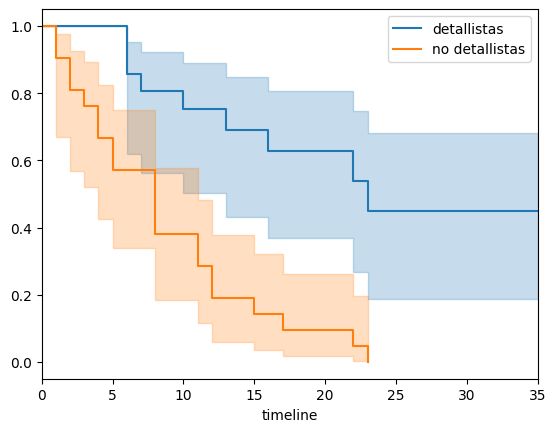

In [14]:
# Grafica de los detallistas
km_d.plot_survival_function(label='detallistas')
km_nd.plot_survival_function(label='no detallistas')
plt.xlim(0,35);

# Si los intervalos de confianza se intersectan entonces, las funciones de supervivencia son iguales en esa intersección 
# Osea en esa parte cortan al mismo tiempo, sean detallistas o no detallistas


###  Para corroborar si las funciones de supervivencia son iguales o son diferentes tenemos que hacer una prueba de hipótesis

Prueba de hipotesis (Log-rank-test)

$Ho = S(1)=S(2)$

$Ha = S(1)\neg(2)$

In [15]:
from lifelines.statistics import logrank_test

In [16]:
LRT = logrank_test(detallistas['t'],no_detallistas['t'],detallistas['estado'],no_detallistas['estado'])
LRT.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55>

In [17]:
LRT.p_value

4.168809109334511e-05

### Como el p value es menor a alpha, con un nivel de significancia entonces rechazamos H0
### Por lo que las funciones de supervivencia son distintas, osea que la relación de los detallistas dura mas que la de los no detallistas

In [18]:
km_d.median_survival_time_

23.0

### La mitad de las relaciones de los detallistas dura menos de 23 semanas

In [19]:
km_nd.median_survival_time_

8.0

### La mitad de las relaciones de los no detallistas dura menos de 8 semanas